Q1. Build linear and logistic regression using gradient descent on numpy only (Do not use other libraries like sklearn). Dataset for linear regressions can be found [here](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). Dataset for logistic regression can be found [here](https://drive.google.com/file/d/1CReNesgs3iqZi08rr5a1h0YOci0BmC6H/view). The main focus here is not the accuracy of the model but the implementation of these algorithms from scratch. 

Q2. Use pandas to extract insights on this [dataset](https://drive.google.com/file/d/1Fwxy08NgMAVcUvsRVd94KEiqgmYSvOKA/view). \
[movie_metadata.csv](https://drive.google.com/file/d/1Fwxy08NgMAVcUvsRVd94KEiqgmYSvOKA/view) 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
df = pd.read_csv(r"C:\Users\KUDSIT\Desktop\rahul\databeat-task\Databeat AI\ML\dataset\winequality-red.csv",sep=";")

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# df['quality'].value_counts()

In [6]:
# df.info()

In [7]:
# df.describe()

In [8]:
# df.shape

In [9]:
# round(100*(df.isnull().sum()/len(df)),2).sort_values(ascending=False)

In [10]:
# round(100*(df.isnull().sum(axis=1)/len(df)),2).sort_values(ascending=False)

In [11]:
# No missing / Null value in either rows or columns

dub_df=df.copy()
dub_df.drop_duplicates(subset=None,inplace=True)

In [12]:
print(dub_df.shape)
print(df.shape)

# The shape is not same. Hence there were duplicate values in the dataset

df=dub_df

(1359, 12)
(1599, 12)


In [13]:
# checks Junk/Unknown values in the entire dataset

# for col in df:
#     print(df[col].value_counts(ascending=False), '\n\n\n')

In [14]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

In [15]:
df_train.shape

(951, 12)

In [16]:
df_test.shape

(408, 12)

$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$

In [43]:
w=0
b=0

In [44]:
def hypothesis(b, w, X):
    return b+w*X
def cost_calc(b, w, X, y):
    return (1/2*m) * np.sum((hypothesis(b, w, X) - y)**2)

https://miro.medium.com/max/282/1*5_3TeXfjy-2uTXEe1dms9A.png

In [45]:
m = len(df)
def gradient_descent(b,w, X, y, epoch, alpha):
    cost = []
    i = 0
    while i < epoch:
        hx = hypothesis(b,w, X)
        # print(hx)
        b -= alpha*(np.sum(hx - y)/m)
        w -= (alpha * np.sum((hx - y) * X))/m
        cost.append(cost_calc(b,w, X, y))
        i += 1
    return b,w, cost

In [46]:
def predict(b, w, X, y, epoch, alpha):
    b, w, cost = gradient_descent(b, w, X, y, epoch, alpha)
    return hypothesis(b, w, X), cost, b, w

In [47]:
# def predict(theta, X, y, epoch, alpha):
#     theta, cost = gradient_descent(theta, X, y, epoch, alpha)
#     return hypothesis(theta, X), cost, theta

In [48]:
x = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
y = ["quality"]

In [49]:
y_predict, cost, b, w = predict(b, w , df[x], df[y], 10, 0.01)

In [51]:
print(b, w)

alcohol                 0.0
chlorides               0.0
citric acid             0.0
density                 0.0
fixed acidity           0.0
free sulfur dioxide     0.0
pH                      0.0
quality                 0.0
residual sugar          0.0
sulphates               0.0
total sulfur dioxide    0.0
volatile acidity        0.0
dtype: float64 alcohol                 0.0
chlorides               0.0
citric acid             0.0
density                 0.0
fixed acidity           0.0
free sulfur dioxide     0.0
pH                      0.0
quality                 0.0
residual sugar          0.0
sulphates               0.0
total sulfur dioxide    0.0
volatile acidity        0.0
dtype: float64


ValueError: x and y must be the same size

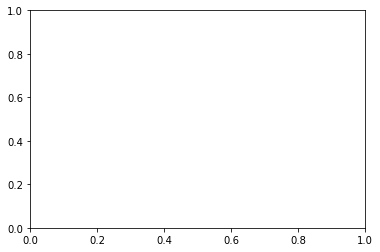

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df[x], df[y], label = 'Original y')
plt.scatter(df[x], y_predict, label = 'predicted y')
plt.legend(loc = "upper left")
plt.xlabel("input feature")
plt.ylabel("Original and Predicted Output")
plt.show()